In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [3]:
# 1. Generate an imbalanced dataset
X, y = make_classification(
    n_samples=2000,
    n_features=10,
    n_informative=6,
    n_redundant=2,
    n_clusters_per_class=1,
    weights=[0.9, 0.1],   # 90% of class 0, 10% of class 1
    flip_y=0,
    random_state=0
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

print("Class distribution in training set:", np.bincount(y_train))

Class distribution in training set: [1260  140]


=== Without Class Weights ===
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       540
           1       0.98      0.88      0.93        60

    accuracy                           0.99       600
   macro avg       0.98      0.94      0.96       600
weighted avg       0.99      0.99      0.99       600



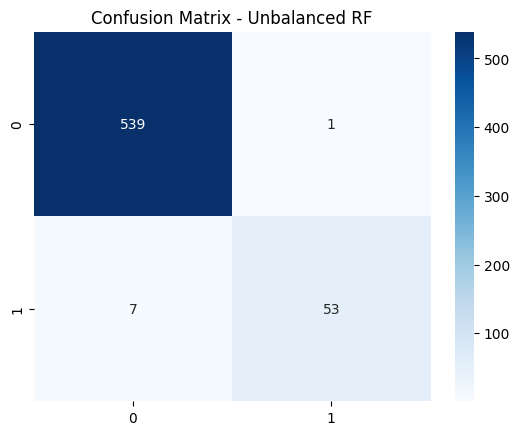

In [4]:
# 2. Train a Random Forest WITHOUT class weights
rf_unbalanced = RandomForestClassifier(
    n_estimators=100,
    random_state=0
)
rf_unbalanced.fit(X_train, y_train)
y_pred_unbalanced = rf_unbalanced.predict(X_test)

print("=== Without Class Weights ===")
print(classification_report(y_test, y_pred_unbalanced))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_unbalanced)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.title("Confusion Matrix - Unbalanced RF")
plt.show()


=== With Class Weights ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       540
           1       0.96      0.82      0.88        60

    accuracy                           0.98       600
   macro avg       0.97      0.91      0.94       600
weighted avg       0.98      0.98      0.98       600



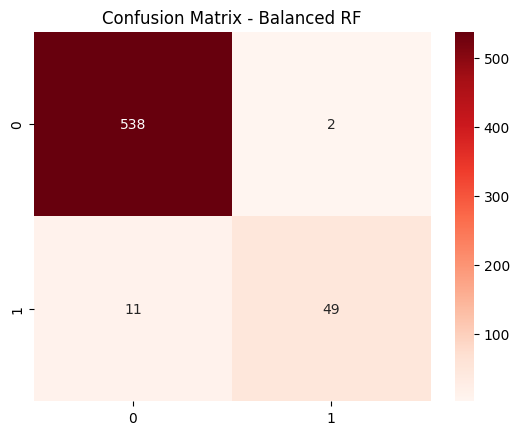

In [5]:
# 3. Train a Random Forest WITH class weights
rf_balanced = RandomForestClassifier(
    n_estimators=100,
    class_weight="balanced",  # reweights classes inversely proportional to freq
    random_state=0
)
rf_balanced.fit(X_train, y_train)
y_pred_balanced = rf_balanced.predict(X_test)

print("=== With Class Weights ===")
print(classification_report(y_test, y_pred_balanced))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_balanced)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=[0,1], yticklabels=[0,1])
plt.title("Confusion Matrix - Balanced RF")
plt.show()